# EDA Pima Indians Diabetes Database

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

The dataset has the following features (columns):

Pregnancies: Number of times pregnant

Glucose: Plasma glucose concentration, 2 hours in an oral glucose tolerance test

BloodPressure: Diastolic blood pressure ( mmHg )

SkinThickness: Triceps skin fold thickness ( mm )

Insulin: 2-Hour serum insulin ( mu(U/ml ))

BMI: Body mass index (weight in kg / height in meter square )

DiabetesPedigreeFunction: It indicates the function which scores likelihood of diabetes based on family history

Age: Age (in years)

Outcome: Whether patient is diagnosed with Diabetes (0 for No, 1 for Yes)

In [2]:
#Loading the libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Loading the data and getting info about it 
df=pd.read_csv(r"C:\Users\ankit\Desktop\Datasets\diabetes\archive (12)\diabetes.csv")


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


The features "Glucose," "Blood Pressure," "Skin Thickness," "Insulin," and "BMI" all have a minimum value of 0. This is illogical because these values can't be zero. Therefore, in our circumstance, this can be safely referred to as "missing data". The 0-valued rows must either be removed or replaced with the mean or median value for that feature.

In [10]:
#Check for null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Analysis of Pregnancies

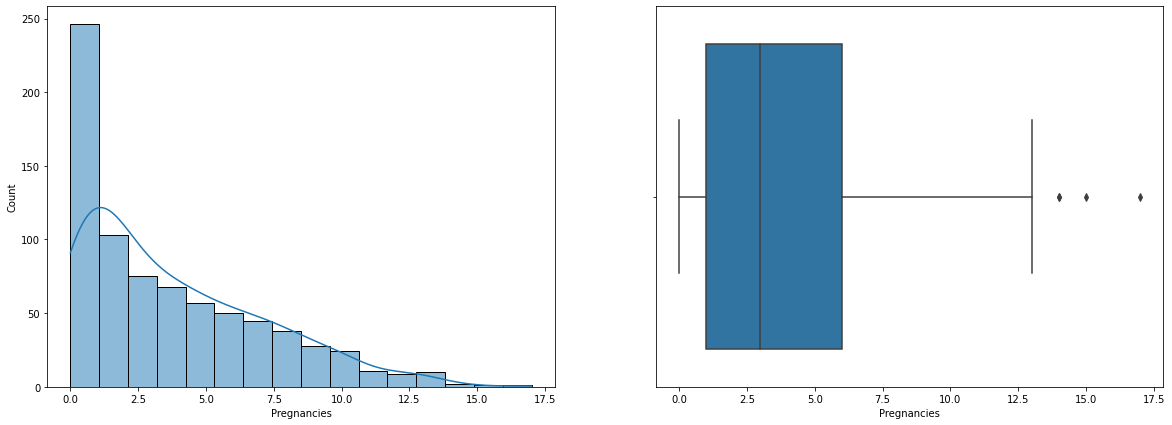

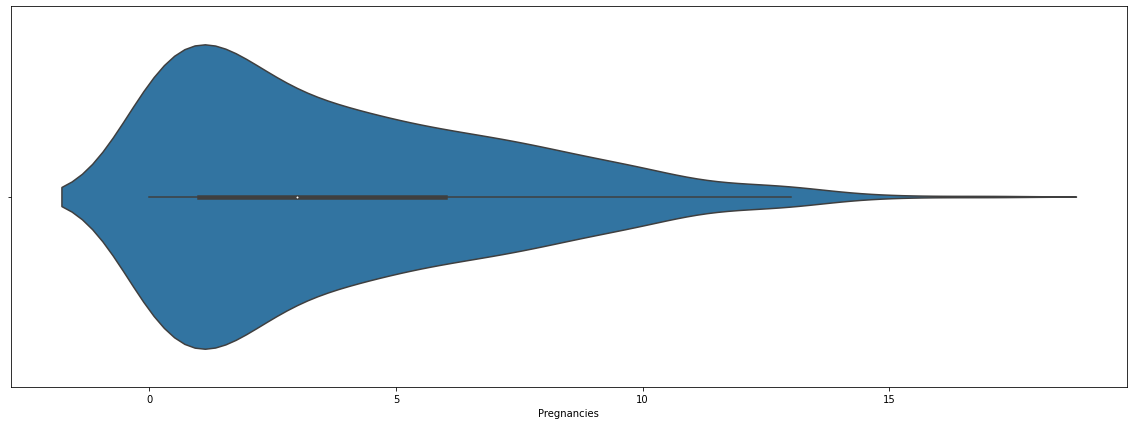

In [14]:
fig1, ax1 = plt.subplots(1, 2, figsize=(20, 7))
fig2, ax2 = plt.subplots(figsize=(20, 7))

sns.histplot(data=df, x="Pregnancies", kde=True, ax=ax1[0])
sns.boxplot(data=df, x="Pregnancies", ax=ax1[1])

sns.violinplot(data=df, x="Pregnancies", ax=ax2)

plt.show()

In [15]:
print("Median of Pregnancies: ", df["Pregnancies"].median())
print("Maximum of Pregnancies: ", df["Pregnancies"].max())

Median of Pregnancies:  3.0
Maximum of Pregnancies:  17


In [16]:
df["Pregnancies"].value_counts()


1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

From the above analysis we observe that:

Most patients had 0, 1 or 2 pregnancies.
Median value of Pregnancies is 3.
Also, patients had upto 17 pregnancies!
There are 3 outliers on the boxplot. But, let's not remove them for now.

Analysis of Outcome

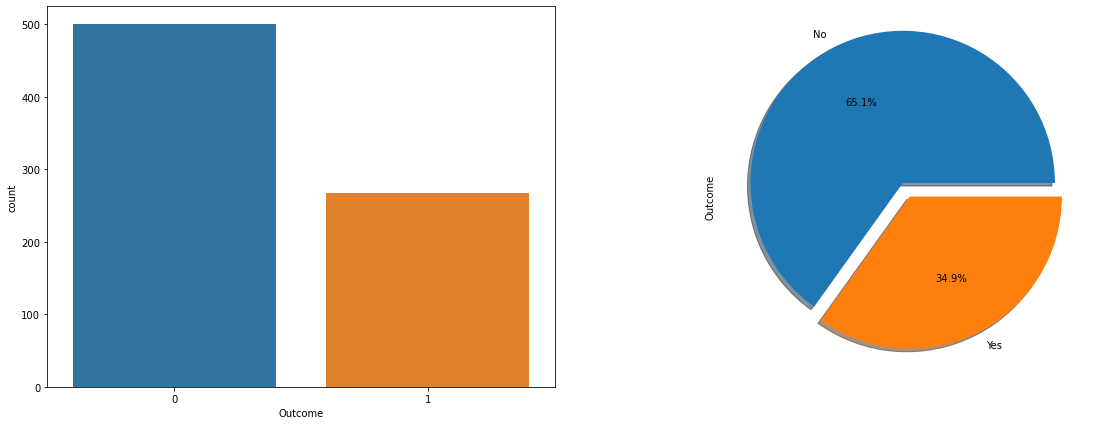

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(20, 7))

sns.countplot(data=df, x="Outcome", ax=ax[0])
df["Outcome"].value_counts().plot.pie(explode=[0.1, 0],autopct="%1.1f%%", labels=["No", "Yes"], shadow=True, ax=ax[1])

plt.show()

We observe from the above plot that:

65.1% patients in the dataset do NOT have diabetes.
34.9% patients in the dataset has diabetes.

Analysis of Glucose

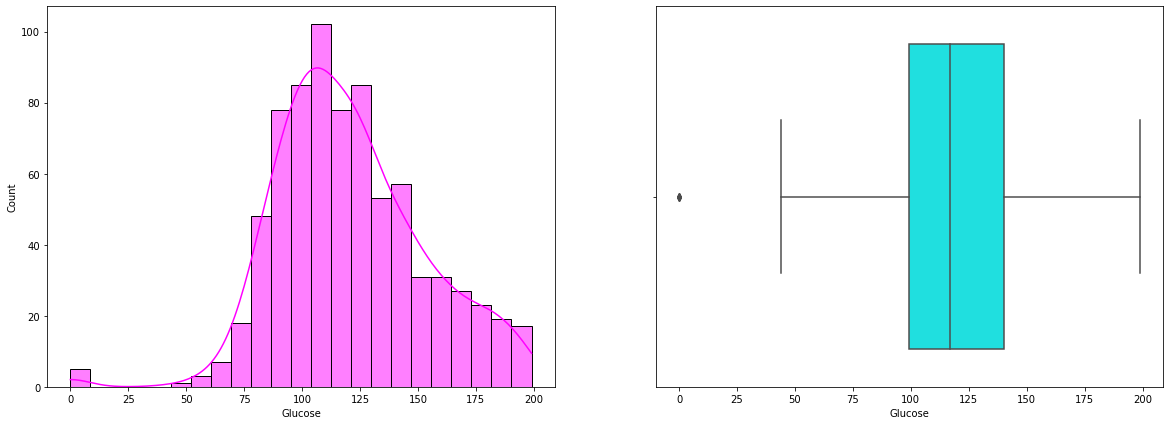

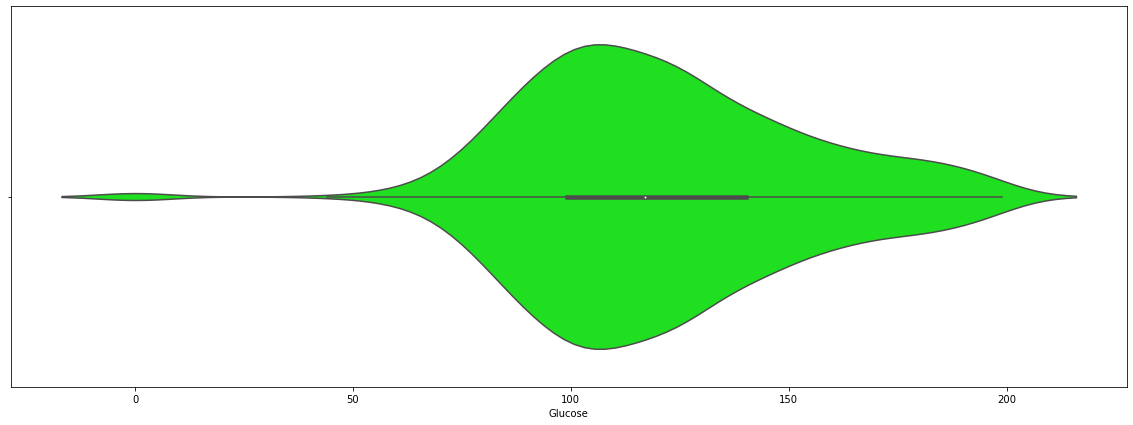

In [18]:
fig3, ax3 = plt.subplots(1, 2, figsize=(20, 7))
fig4, ax4 = plt.subplots(figsize=(20, 7))

sns.histplot(data=df, x="Glucose", kde=True, ax=ax3[0], color = 'magenta')
sns.boxplot(data=df, x="Glucose", ax=ax3[1], color = 'aqua')

sns.violinplot(data=df, x="Glucose", ax=ax4, color = 'lime')

plt.show()

In [19]:
print("Median of Glucose: ", df["Glucose"].median())
print("Maximum of Glucose: ", df["Glucose"].max())
print("Mean of Glucose: ", df["Glucose"].mean())

Median of Glucose:  117.0
Maximum of Glucose:  199
Mean of Glucose:  120.89453125


In [20]:
print("Rows with Glucose value of 0: ", df[df["Glucose"] == 0].shape[0])


Rows with Glucose value of 0:  5


We observe that:

Median (117.0) and mean (120.8) of Glucose lie very close to each other i.e. the distribution is more or less symmetric and uniform.
As seen from the box plot, an outlier lies on 0-value, which I talked about earlier.
There are 5 rows with Glucose value as 0. This is not logical, so we need to keep this in mind.

Analysis of Blood Pressure

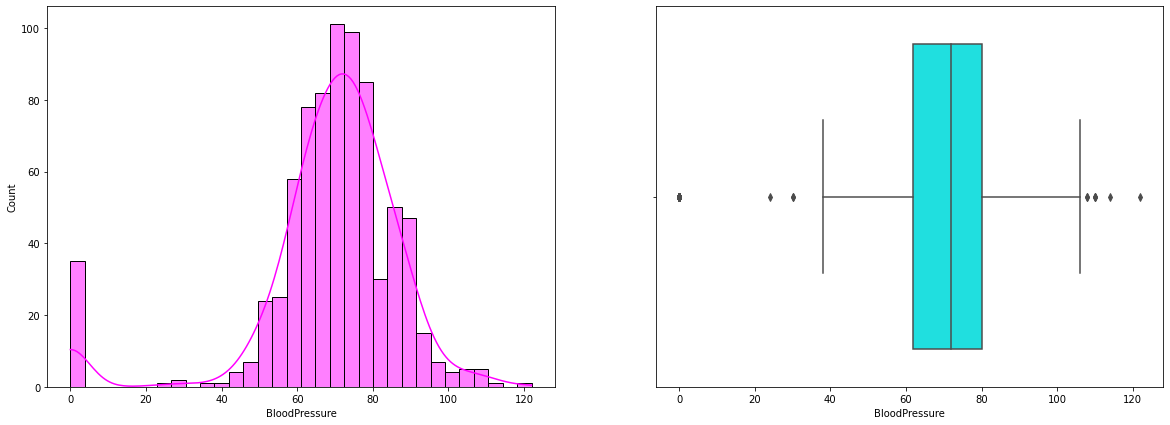

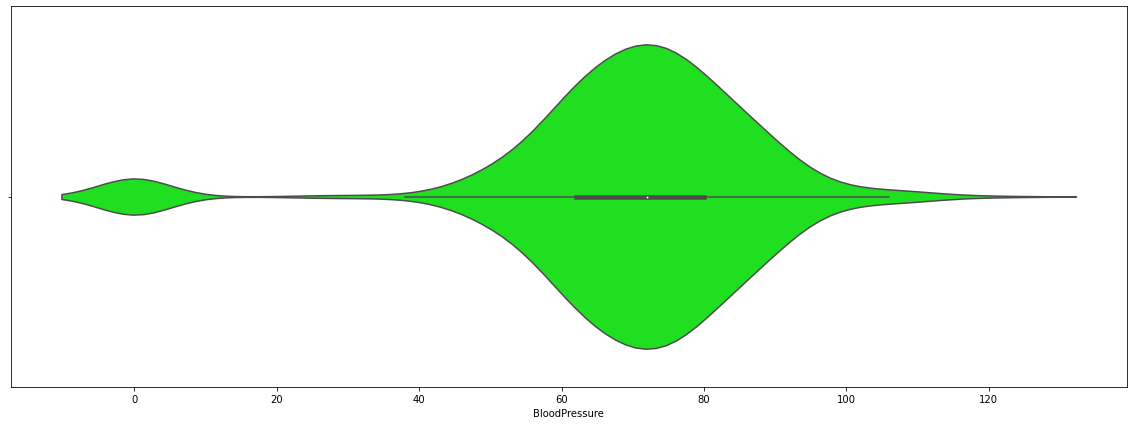

In [21]:
fig5, ax5 = plt.subplots(1, 2, figsize=(20, 7))
fig6, ax6 = plt.subplots(figsize=(20, 7))

sns.histplot(data=df, x="BloodPressure",kde=True,  ax=ax5[0],color = 'magenta')
sns.boxplot(data=df, x="BloodPressure", ax=ax5[1], color = 'aqua')

sns.violinplot(data=df, x="BloodPressure", ax=ax6, color = 'lime')

plt.show()

In [22]:
print("Median of Blood Pressure: ", df["BloodPressure"].median())
print("Maximum of Blood Pressure: ", df["BloodPressure"].max())
print("Mean of Pressure: ", df["BloodPressure"].mean())

Median of Blood Pressure:  72.0
Maximum of Blood Pressure:  122
Mean of Pressure:  69.10546875


In [23]:
print("Rows with BloodPressure value of 0: ", df[df["BloodPressure"] == 0].shape[0])


Rows with BloodPressure value of 0:  35


We observe that:​

Median (72.0) and mean (69.1) of BloodPressure lie very close to each other i.e. the distribution is more or less symmetric and uniform.
As seen from the box plot and violin plot, some outliers lie on 0-value, which I talked about earlier.
There are 35 rows with BloodPressure value as 0. This is not logical.

Analysis of Insulin

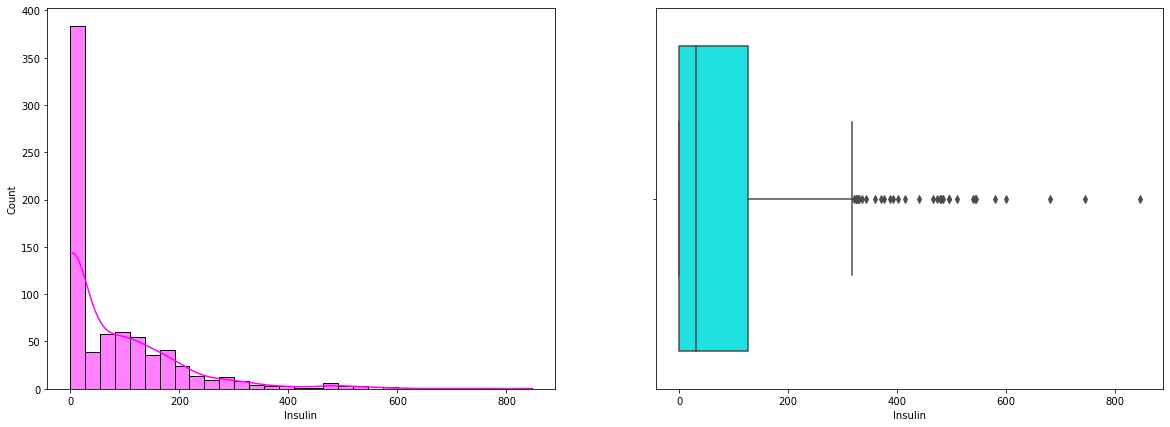

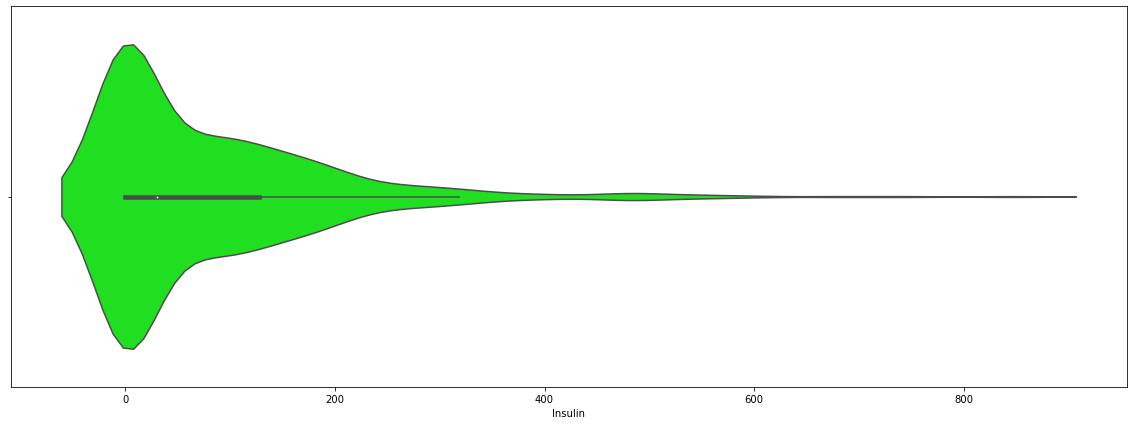

In [24]:
fig7, ax7 = plt.subplots(1, 2, figsize=(20, 7))
fig8, ax8 = plt.subplots(figsize=(20, 7))

sns.histplot(data=df, x="Insulin", kde=True, ax=ax7[0],color = 'magenta')
sns.boxplot(data=df, x="Insulin", ax=ax7[1],color = 'aqua')

sns.violinplot(data=df, x="Insulin", ax=ax8,color = 'lime')

plt.show()

In [25]:
print("Rows with Insulin value of 0: ", df[df["Insulin"] == 0].shape[0])


Rows with Insulin value of 0:  374


The plots for Insulin are highly skewed. Also, the 0-value logical error is the most for this feature. 374 out of 768 instances have value of Insulin as 0.

Analysis of BMI

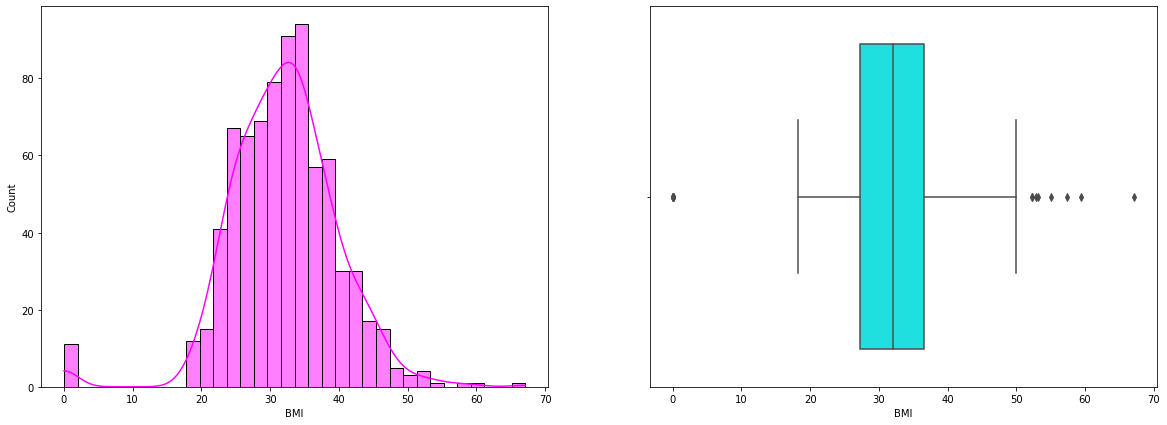

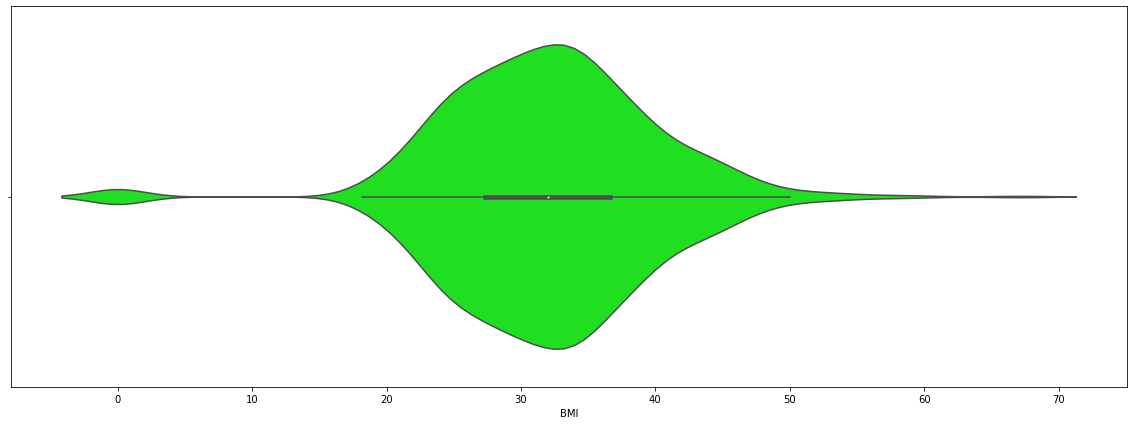

In [26]:
fig9, ax9 = plt.subplots(1, 2, figsize=(20, 7))
fig10, ax10 = plt.subplots(figsize=(20, 7))

sns.histplot(data=df, x="BMI", kde=True, ax=ax9[0], color = 'magenta')
sns.boxplot(data=df, x="BMI", ax=ax9[1], color = 'aqua')

sns.violinplot(data=df, x="BMI", ax=ax10 , color = 'lime')

plt.show()

In [27]:

print("Median of BMI: ", df["BMI"].median())
print("Maximum of BMI: ", df["BMI"].max())
print("Mean of BMI: ", df["BMI"].mean())

Median of BMI:  32.0
Maximum of BMI:  67.1
Mean of BMI:  31.992578124999977


In [28]:
print("Rows with BMI value of 0: ", df[df["BMI"] == 0].shape[0])


Rows with BMI value of 0:  11


We observe that:

Median (32.0) and Mean (31.9) of BMI are very close to each other. Thus, the distribution is more or less symmetric and uniform
Maximum BMI is 67.1
There are 11 rows with BMI value as 0

Analysis of Age

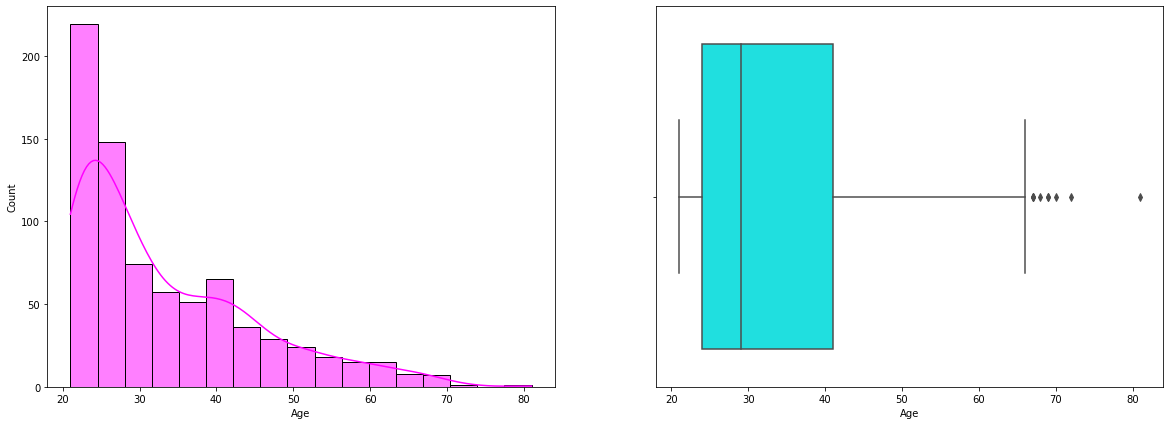

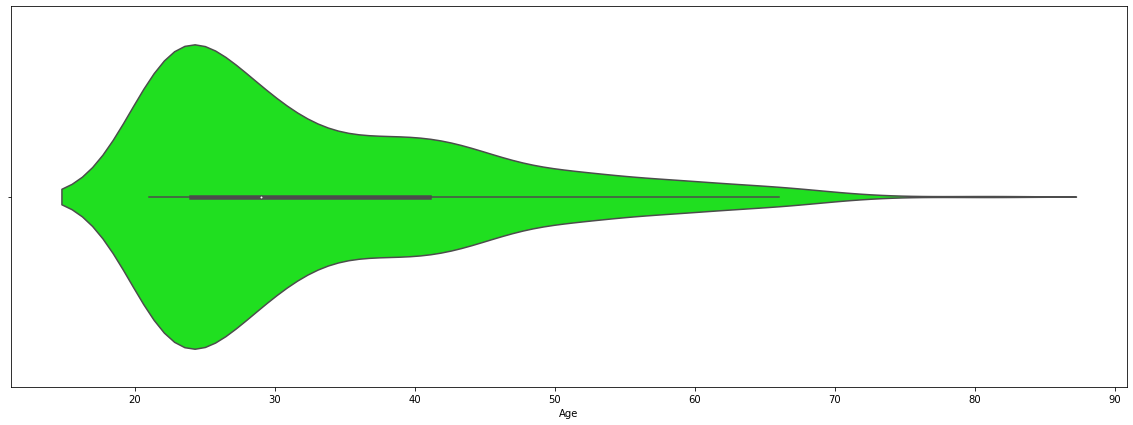

In [31]:
fig13, ax13 = plt.subplots(1, 2, figsize=(20, 7))
fig14, ax14 = plt.subplots(figsize=(20, 7))

sns.histplot(data=df, x="Age", kde=True, ax=ax13[0],color = 'magenta')
sns.boxplot(data=df, x="Age", ax=ax13[1],color = 'aqua')

sns.violinplot(data=df, x="Age", ax=ax14,color = 'lime')

plt.show()

In [32]:
print("Median of Age: ", df["Age"].median())
print("Maximum of Age: ", df["Age"].max())
print("Mean of Age: ", df["Age"].mean())

Median of Age:  29.0
Maximum of Age:  81
Mean of Age:  33.240885416666664


We again observe that:

The distribution of Age is skewed on the left side.
There are some outliers in the Box plot for Age.

Analyzing Correlations

In [33]:
# The 2D correlation matrix
corr_matrix = df.corr()

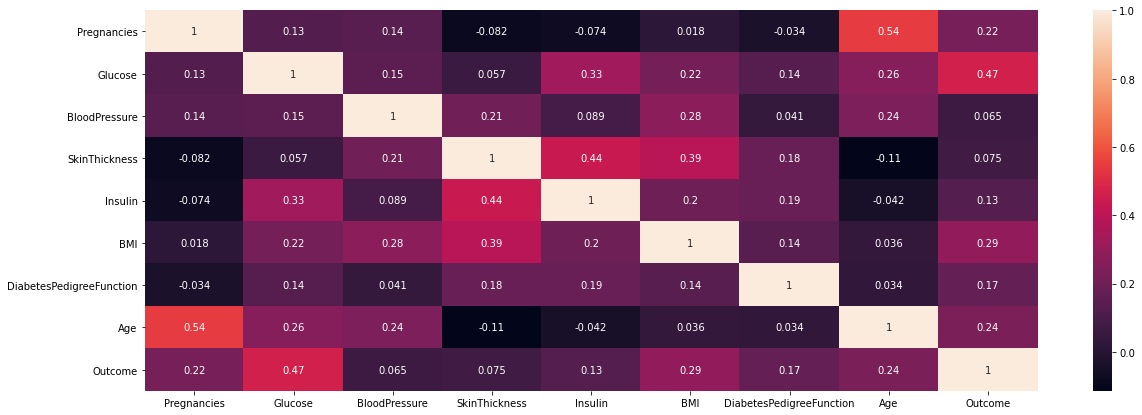

In [34]:
# Plotting the heatmap of corr

fig20, ax20 = plt.subplots(figsize=(20, 7))
dataplot = sns.heatmap(data=corr_matrix, annot=True, ax=ax20)
plt.show()

In [35]:
corr_matrix["Outcome"].sort_values(ascending=False)


Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

We observe that:

Glucose has the maximum positive linear correlation with Outcome, which is logical.
BloodPressure has the lowest positive linear correlation with Outcome.
No feature has a negative linear correlation with Outcome.

In [5]:
$ ipython locate


SyntaxError: invalid syntax (<ipython-input-5-d870970cb45f>, line 1)